<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**WHO Life Expectancy**</center>

## **Table of Contents**

1. [**Problem Statement**](#Section1)<br>
2. [**Importing Libraries**](#Section2)<br>
3. [**Loading Data**](#Section3)<br>
4. [**Description of the Dataset**](#Section4)<br>
5. [**Data Exploration**](#Section5)<br>
  - 5.1 [**Data Pre-processing**](#Section501)<br>
  - 5.2 [**Exploratory Data Analysis**](#Section502)<br>
6. [**Making data ready for model**](#Section6)<br>
7. [**Model Building**](#Section7)<br>
8. [**Model Evaluation**](#Section8)<br>
9. [**Conclusion**](#Section9)<br>

---
<a name=Section1></a>
# **1. Problem Statement**
---
<center><img src="https://miro.medium.com/max/1400/1*MhBiZM1iUOZnZuLXc40RNA.png" height= 450 width= 800 ></center>
 
- It has been observed that in the past 15 years , there has been a huge **development** in the **health sector** resulting in improvement of human **mortality rates** especially in the developing nations in comparison to the past **30 years**.

 
- WHO wants to predict **life expectancy** of countries.This will help in **suggesting** a country which area should be given importance in order to efficiently improve the life expectancy of its **population**.

## **Scenario:**

- You have been hired as a data scientist to make a system that can tell a **country’s life expectancy**.


- Your task is to build a **regression model** using the dataset.

- In order to do so, you’ll have to read and study the dataset properly.






<a name=Section2></a>

---
# **2. Importing Libraries**
---


<a name = Section21></a>
### **2.1 Installing Libraries**

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
     |████████████████████████████████| 69 kB 6.1 MB/s 


<a name = Section22></a>
### **2.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (2.1) and below (2.2) again after restarting the runtime.

In [ ]:
!pip install pandas-profiling -q --upgrade

     |████████████████████████████████| 261 kB 26.1 MB/s 
     |████████████████████████████████| 596 kB 48.5 MB/s 
     |████████████████████████████████| 3.1 MB 48.8 MB/s 
     |████████████████████████████████| 303 kB 43.6 MB/s 
     |████████████████████████████████| 10.1 MB 40.4 MB/s 
     |████████████████████████████████| 102 kB 12.6 MB/s 
     |████████████████████████████████| 675 kB 44.7 MB/s 
     |████████████████████████████████| 62 kB 889 kB/s 
     |████████████████████████████████| 812 kB 45.9 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


<a name = Section23></a>
### **2.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from datetime import datetime as dt                                 # For datetime funcationality
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.express as ex                                         # Importing Plotly Express for Dynamic Plotting.
import plotly.graph_objs as go                                      # Importing Plotly graphs for Dynamic Plotting.
import plotly.offline as pyo                                        # Importing offline Express for Dynamic Plotting.
from plotly.subplots import make_subplots                           # Importing Plotly Subplots to plot Dynamic subplots.
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings.
warnings.filterwarnings("ignore")                                   # Warnings will appear only once.
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.figure_factory as ff                                  # Calling the figure factory to create unique chart types.
#-------------------------------------------------------------------------------------------------------------------------------
import configparser                                                 # Importing Configparser for modifying configration of the script.
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                      # Importing LabelEncoder to encode categorical variables.
from sklearn.preprocessing import StandardScaler                    # Importing StandardScaler to standerdise variables.    
from sklearn.model_selection import train_test_split                # Importing TTS for training the ML model. 
from sklearn.model_selection import GridSearchCV                    # Importing GridSearchCV for Cross validation.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression                   # Importing LinearRegression for perfornming LR.
from sklearn.ensemble import RandomForestRegressor                  # Importing RandomForestRegressor for performing RF operations.
from sklearn.svm import SVR                                         # Importing SVR for performing SVR operations.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Importing Performence metrics.
#-------------------------------------------------------------------------------------------------------------------------------
import warnings             
warnings.filterwarnings(action='ignore')

---
<a name=Section3></a>
# **3. Loading Data**
---

In [2]:
train_data =pd.read_csv("/content/WHO_train.csv")
print("Data Shape is:", train_data.shape)
train_data.head()

Data Shape is: (2350, 23)


Id   Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0   391  Bulgaria  2008   Developed        155.00000              1 10.98000   
1   289    Bhutan  2014  Developing        216.00000              0  0.01000   
2    27   Albania  2004  Developing         17.00000              1  4.54000   
3   999   Germany  2010   Developed         76.00000              2 11.20000   
4  1469   Lebanon  2004  Developing         13.00000              1  2.10000   

   percentage expenditure  Hepatitis B  Measles      BMI   under-five deaths   \
0               107.98261     96.00000         1 61.50000                   1   
1               209.39213     99.00000         0 23.60000                   1   
2               221.84280     99.00000         7 48.90000                   1   
3              7584.07858     88.00000       780 59.90000                   3   
4               618.36149     75.00000       213  6.20000                   1   

     Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0 96.00000            6.61000     95.00000    0.10000  7296.12248   
1 98.00000            3.57000     99.00000    0.50000  2522.79680   
2 98.00000            6.38000     97.00000    0.10000  2416.58824   
3 94.00000           11.25000     95.00000    0.10000 41785.55691   
4 74.00000            8.91000     75.00000    0.10000  5424.22356   

     Population   thinness  1-19 years   thinness 5-9 years  \
0 7492561.00000                2.10000              2.10000   
1  776448.00000               15.70000             16.20000   
2  326939.00000                1.80000              1.90000   
3 8177693.00000                1.10000              1.10000   
4 3863267.00000                4.70000              4.60000   

   Income composition of resources  Schooling  life_expectancy  
0                          0.76100   13.80000         72.90000  
1                          0.59600   12.50000         69.40000  
2                          0.68100   10.90000         73.00000  
3                          0.90700   16.70000         81.00000  
4                          0.00000   14.20000         73.70000

In [3]:
test_data =pd.read_csv("/content/WHO_test.csv")
print("Data Shape is:", test_data.shape)
test_data.head()

Data Shape is: (588, 22)


Id     Country  Year      Status  Adult Mortality  infant deaths  \
0  1554  Madagascar  2015  Developing         22.00000             28   
1  2644       Tonga  2004  Developing        151.00000              0   
2  2322   Singapore  2006   Developed         66.00000              0   
3  1875   Nicaragua  2001  Developing        193.00000              4   
4  1278      Israel  2003  Developing         71.00000              1   

   Alcohol  percentage expenditure  Hepatitis B  Measles      BMI   \
0      nan                 0.00000     69.00000         3  2.50000   
1  1.80000               423.29535      9.00000         0 68.60000   
2  1.55000              2639.37696     95.00000        23  3.50000   
3  3.51000                22.35595     87.00000         0 43.50000   
4  2.32000              1731.75575     98.00000       124 59.60000   

   under-five deaths     Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                  38 71.00000                nan     69.00000    0.30000   
1                   0 91.00000            4.87000      9.00000    0.10000   
2                   0 95.00000            3.66000     95.00000    0.10000   
3                   5 89.00000            5.26000     87.00000    0.40000   
4                   1 93.00000            7.44000     93.00000    0.10000   

          GDP    Population   thinness  1-19 years   thinness 5-9 years  \
0    41.85760 2423488.00000                7.10000              7.10000   
1  2284.37858     146.00000                0.10000              0.10000   
2 33579.85948           nan                2.10000              2.00000   
3   143.67580    5175.00000                2.20000              2.10000   
4 18946.99942   66897.00000                1.10000              1.10000   

   Income composition of resources  Schooling  
0                          0.51100   10.30000  
1                          0.69300   14.60000  
2                          0.83900   13.90000  
3                          0.57000   10.40000  
4                          0.86300   16.00000

<a name=Section4></a>

---
# **4. Data Description**
---


In [ ]:
train_data.describe()

Id       Year  Adult Mortality  infant deaths    Alcohol  \
count 2350.00000 2350.00000       2341.00000     2350.00000 2192.00000   
mean  1455.02468 2007.48383        165.31311       30.16170    4.57133   
std    856.87133    4.64009        124.57304      114.79702    4.06608   
min      0.00000 2000.00000          1.00000        0.00000    0.01000   
25%    697.25000 2003.00000         73.00000        0.00000    0.83000   
50%   1452.50000 2007.00000        144.00000        3.00000    3.72500   
75%   2195.75000 2012.00000        228.00000       23.00000    7.60000   
max   2937.00000 2015.00000        723.00000     1800.00000   17.87000   

       percentage expenditure  Hepatitis B     Measles        BMI   \
count              2350.00000   1903.00000   2350.00000 2320.00000   
mean                721.37747     80.81766   2446.73574   38.18483   
std                1930.01754     24.98948  11512.78431   20.07347   
min                   0.00000      1.00000      0.00000    1.00000   
25%                   4.31052     77.00000      0.00000   19.17500   
50%                  63.25015     92.00000     17.00000   43.20000   
75%                 433.32713     96.00000    417.50000   56.10000   
max               19479.91161     99.00000 212183.00000   87.30000   

       under-five deaths       Polio  Total expenditure  Diphtheria   \
count          2350.00000 2333.00000         2164.00000   2333.00000   
mean             41.91532   82.27733            5.90156     82.13288   
std             157.15336   23.65698            2.47708     23.75490   
min               0.00000    3.00000            0.37000      2.00000   
25%               0.00000   77.00000            4.24000     78.00000   
50%               4.00000   93.00000            5.73000     92.00000   
75%              32.00000   97.00000            7.46250     97.00000   
max            2500.00000   99.00000           17.60000     99.00000   

        HIV/AIDS          GDP       Population   thinness  1-19 years  \
count 2350.00000   1992.00000       1828.00000             2320.00000   
mean     1.71349   7271.39646   12316511.55962                4.85655   
std      4.94786  13967.26295   53543207.65137                4.37919   
min      0.10000      1.68135         34.00000                0.10000   
25%      0.10000    454.11278     216781.50000                1.60000   
50%      0.10000   1705.25945    1412966.50000                3.40000   
75%      0.80000   5793.66557    7391118.50000                7.22500   
max     50.30000 119172.74180 1161977719.00000               27.70000   

        thinness 5-9 years  Income composition of resources  Schooling  \
count           2320.00000                       2214.00000 2217.00000   
mean               4.89250                          0.62346   11.95255   
std                4.46569                          0.21495    3.40893   
min                0.10000                          0.00000    0.00000   
25%                1.60000                          0.48925   10.00000   
50%                3.40000                          0.67500   12.30000   
75%                7.30000                          0.77700   14.20000   
max               28.60000                          0.94800   20.70000   

       life_expectancy  
count       2341.00000  
mean          69.11427  
std            9.58280  
min           39.00000  
25%           63.00000  
50%           72.00000  
75%           75.60000  
max           89.00000

In [ ]:
test_data.describe()

Id       Year  Adult Mortality  infant deaths   Alcohol  \
count  588.00000  588.00000        587.00000      588.00000 552.00000   
mean  1522.35544 2007.65816        162.73595       30.87245   4.72808   
std    811.46810    4.50861        123.24916      129.78599   3.99888   
min      9.00000 2000.00000          1.00000        0.00000   0.01000   
25%    874.25000 2004.00000         76.00000        0.00000   1.16500   
50%   1514.00000 2008.00000        141.00000        2.00000   3.79500   
75%   2212.75000 2012.00000        222.50000       15.00000   7.99000   
max   2918.00000 2015.00000        682.00000     1700.00000  16.58000   

       percentage expenditure  Hepatitis B     Measles       BMI   \
count               588.00000    482.00000    588.00000 584.00000   
mean                805.68922     81.42531   2311.11054  38.86318   
std                2204.67227     25.40589  11292.58071  19.93456   
min                   0.00000      4.00000      0.00000   1.90000   
25%                   6.85116     78.00000      0.00000  21.10000   
50%                  71.98309     93.00000     11.00000  44.10000   
75%                 471.94925     97.00000    228.00000  56.50000   
max               19099.04506     99.00000 133802.00000  76.70000   

       under-five deaths      Polio  Total expenditure  Diphtheria   \
count           588.00000 586.00000          548.00000    586.00000   
mean             42.51701  83.63652            6.08285     83.08532   
std             173.11991  22.48029            2.57770     23.56985   
min               0.00000   4.00000            0.92000      4.00000   
25%               0.00000  81.00000            4.32750     81.00000   
50%               3.00000  93.00000            5.80500     94.00000   
75%              20.00000  97.00000            7.62250     97.00000   
max            2200.00000  99.00000           15.60000     99.00000   

        HIV/AIDS          GDP       Population   thinness  1-19 years  \
count  588.00000    498.00000        458.00000              584.00000   
mean     1.85646   8330.20650   14497013.95950                4.77277   
std      5.56991  15408.23233   84541955.15156                4.58271   
min      0.10000      5.66873        123.00000                0.10000   
25%      0.10000    535.18526     167233.25000                1.60000   
50%      0.10000   2266.23463    1323898.50000                3.30000   
75%      0.80000   6988.59012    7456112.50000                7.00000   
max     50.60000 114293.84330 1293859294.00000               27.30000   

        thinness 5-9 years  Income composition of resources  Schooling  
count            584.00000                        557.00000  558.00000  
mean               4.78219                          0.64382   12.15269  
std                4.67944                          0.19333    3.15025  
min                0.10000                          0.00000    0.00000  
25%                1.50000                          0.50900   10.40000  
50%                3.25000                          0.68600   12.50000  
75%                6.90000                          0.78600   14.30000  
max               28.30000                          0.93700   20.40000

In [ ]:
# # Making Pre-profiling report for train data
profile = ProfileReport(train_data, title='Pre-Profiling Report for train data', minimal=True)
profile.to_file(output_file='Pre_Profiling_Report_train.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation**
- No of **rows** in train data are **2350**
- No of **columns** in train data are **23**
- No of **numeric** variables are **21**
- No of **categorical** variables are **2**
- Percenatge of **missing cells** are **3.9%**

In [ ]:
# # Making Pre-profiling report for test data
profile = ProfileReport(test_data, title='Pre-Profiling Report for test data', minimal=True)
profile.to_file(output_file='Pre_Profiling_Report_test.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation**
- No of **rows** in test data are **588**
- No of **columns** in test data are **22**
- No of **numeric** variables are **20**
- No of **categorical** variables are **2**
- Percenatge of **missing cells** are **3.7%**

<a name=Section5></a>

---
# **5. Data Exploration**
---

In [ ]:
# crosschecking the number of missing values in train_data:
train_data.isnull().sum()

Id                                   0
Country                              0
Year                                 0
Status                               0
Adult Mortality                      9
infant deaths                        0
Alcohol                            158
percentage expenditure               0
Hepatitis B                        447
Measles                              0
 BMI                                30
under-five deaths                    0
Polio                               17
Total expenditure                  186
Diphtheria                          17
 HIV/AIDS                            0
GDP                                358
Population                         522
 thinness  1-19 years               30
 thinness 5-9 years                 30
Income composition of resources    136
Schooling                          133
life_expectancy                      9
dtype: int64

In [ ]:
# crosschecking the number of missing values in test_data:
test_data.isnull().sum()

Id                                   0
Country                              0
Year                                 0
Status                               0
Adult Mortality                      1
infant deaths                        0
Alcohol                             36
percentage expenditure               0
Hepatitis B                        106
Measles                              0
 BMI                                 4
under-five deaths                    0
Polio                                2
Total expenditure                   40
Diphtheria                           2
 HIV/AIDS                            0
GDP                                 90
Population                         130
 thinness  1-19 years                4
 thinness 5-9 years                  4
Income composition of resources     31
Schooling                           30
dtype: int64

In [4]:
# dropping un-important features
train_data = train_data.drop(['Year','Country'],axis=1)
test_data = test_data.drop(['Year','Country'],axis=1)

<a name=Section51></a>

## **5.1 Data Preprocessing**

**Handling missing values**

In [5]:
train_data['life_expectancy']=train_data['life_expectancy'].fillna(value=train_data['life_expectancy'].mean())

train_data['Adult Mortality']=train_data['Adult Mortality'].fillna(value=train_data['Adult Mortality'].mean())
test_data['Adult Mortality']=test_data['Adult Mortality'].fillna(value=test_data['Adult Mortality'].mean())

**Observation**
- In train data we filled **null** life_expectancy values with mean values
- Similarily we filled **missing values** of Adult Mortality with its mean in train and test data

Using heatmap to see co-relations among the features

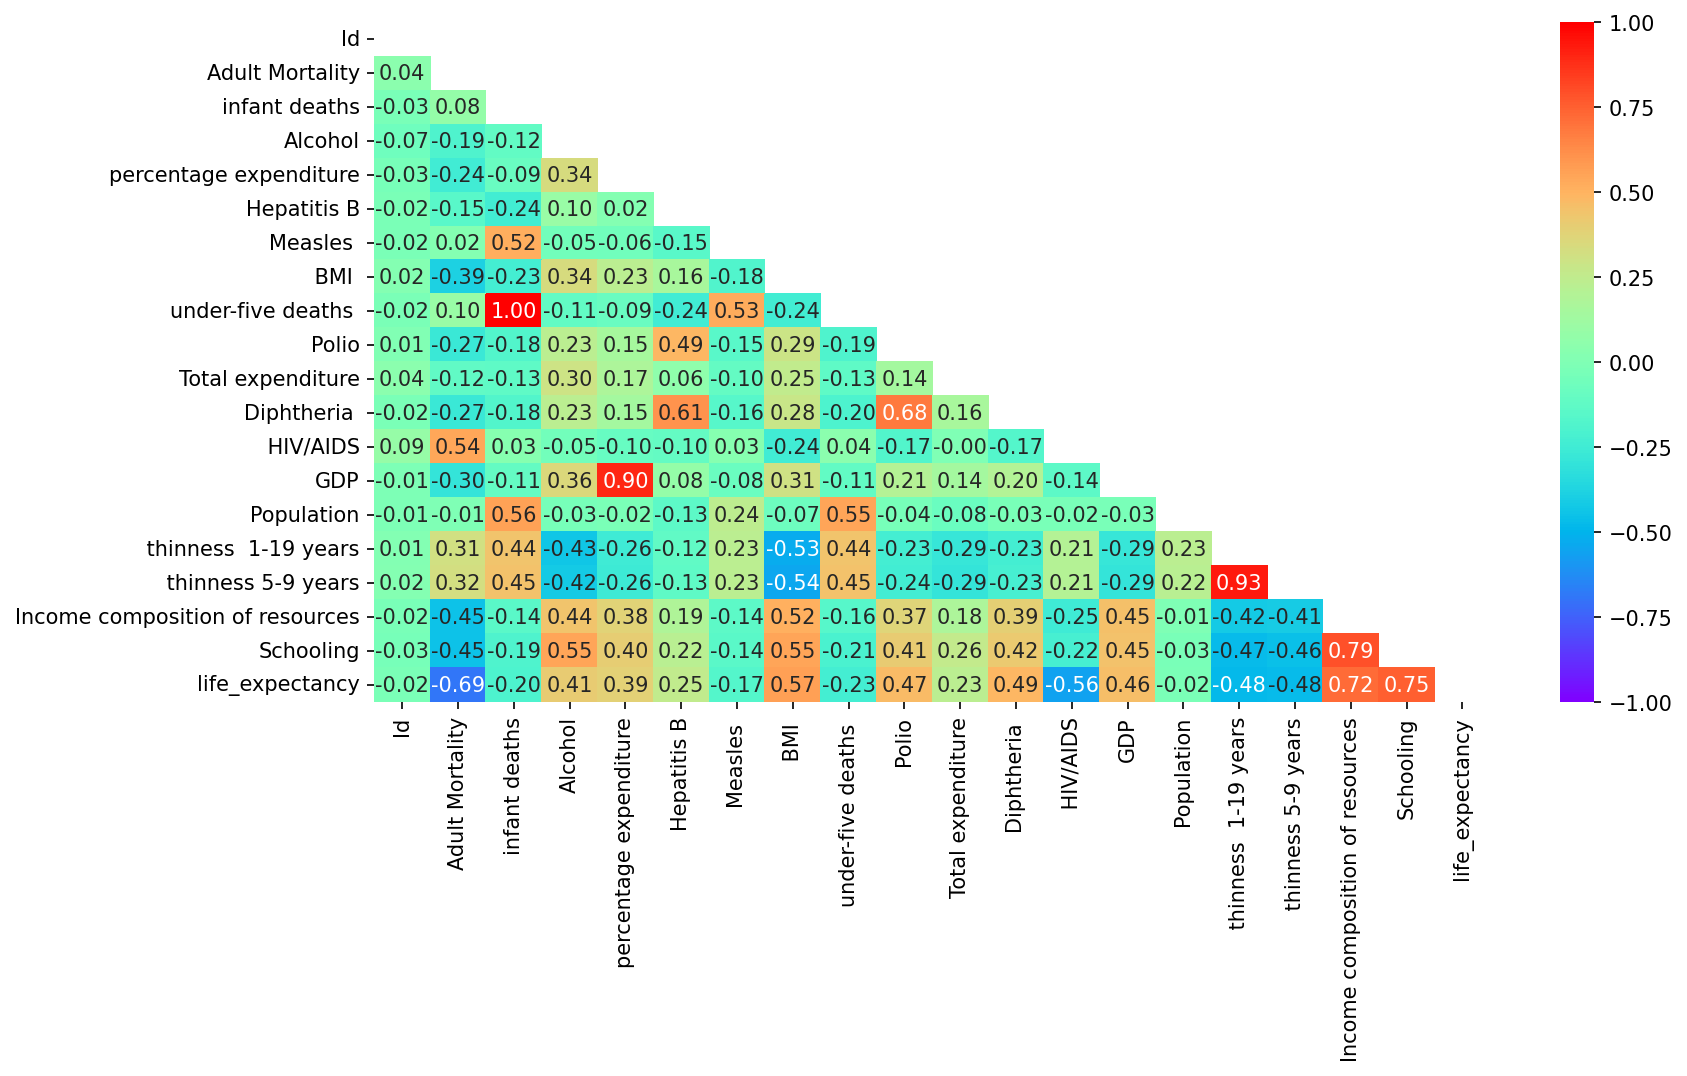

In [ ]:
matrix =np.triu(train_data.corr())
fig,ax =plt.subplots(figsize=(12,6),dpi=150)
sns.heatmap(train_data.corr(),vmax=1,vmin=-1,center=0,annot=True,fmt=".2f",mask=matrix,ax=ax,cmap="rainbow");

**Observation**
- Here we see many features are co-related and dependent on other feature
- For eg - no of **schooling year** and **alchol consumption**
- Similarly there are other features too
- As you can see there are some features that are quite well correlated with each other. So, we would impute these nans using the other features which are nicely correlated with eachother.

**Here is the list of features that we are going to impute with other features**
- Impute 'Polio' feature with 'life expectancy'
- Impute 'Diptheria' feature with 'Polio'.
- Impute 'HepatatisB' feature with ' Diptheria'
- Impute 'BMI' feature with 'Life expactancy' feature.
- Impute 'Total expenditure' with 'Alcohol' feature.
- Impute 'GDP' feature with 'percentage expenditure ' feature.
- Impute 'Population' feature with 'Infant death' feature.
- Impute 'Thin 1-19' feature with 'BMI' feature.
- Impute 'Thin 5-9' feature with 'BMI' feature.
- Impute 'Schooling' feature and 'Income Composition of resources' feature with 'Life expactancy' feature.

**Imputing Alcohol using Schooling**

In [6]:
# performing imputing in Alcohol features
# These values are mean values of the selected interval of other feature
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al

In [7]:
train_data['Alcohol']=train_data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)
test_data['Alcohol']=test_data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

In [8]:
 # Now lets cross check whether values were filled or not
train_data['Alcohol'].isnull().sum()

8

**Observation**
- Looks like we are **still left** with some Nans. But why did this exactly happened ?
- If we could observe in which null values were failed to be filled is because of  the other feature had its Null values. So for now lets fill those **remaining Nans** with the Mean Value

In [9]:
# we filling are missing values of alcohol
train_data['Alcohol']=train_data['Alcohol'].fillna(value=train_data['Alcohol'].mean())
test_data['Alcohol']=test_data['Alcohol'].fillna(value=test_data['Alcohol'].mean())

In [10]:
# crosschaecking null values of alcohol
train_data['Alcohol'].isnull().sum()

0

In [11]:
test_data['Alcohol'].isnull().sum()

0

**Observation**
- Now we can see there no missing values for Alcohol

**Imputing Polio using life_expectancy**

In [12]:
#imputation of polio
# These values are mean values of the selected interval of other feature
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p


In [13]:
train_data['Polio']=train_data[['Polio','life_expectancy']].apply(impute_polio,axis=1)

In [14]:
# cross checking null values
train_data['Polio'].isnull().sum()


0

**Observation**
- After imputing Polio in train data we have **zero** missing values.

In [15]:
# for test data we do not have life expectancy so imputed it using mean values
test_data['Polio']=test_data['Polio'].fillna(value=test_data['Polio'].mean())

In [16]:
# cross checking null values
test_data['Polio'].isnull().sum()

0

**Imputing Diptheria using Polio**


In [17]:
# These values are mean values of the selected interval of other feature
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d

In [18]:
# imputing Diptheria using polio
train_data['Diphtheria ']=train_data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)
test_data['Diphtheria ']=test_data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

In [19]:
# cross checking null values
train_data['Diphtheria '].isnull().sum()

0

In [20]:
test_data['Diphtheria '].isnull().sum()

0

Observation
- There no missing values for Diptheria after imputation

**Imputing 'Hepatitis B' using 'Diptheria'** 

In [21]:
# These values are mean values of the selected interval of other feature
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return 75.0
        elif 15<dip<=30:
            return 20.0
        elif 30<dip<=45:
            return 38.0
        elif 45<dip<=60:
            return 43.0
        elif 60<dip<=80:
            return 63.0
        elif dip>80:
            return 88.4
    else:
        return hep

In [22]:
# Imputing 'Hepatitis B' using 'Diptheria'
train_data['Hepatitis B']=train_data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)
test_data['Hepatitis B']=test_data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [23]:
# cross checking null values
train_data['Hepatitis B'].isnull().sum()

0

In [24]:
test_data['Hepatitis B'].isnull().sum()

0

Observation
- There no missing values for Hepatitis B after imputation

**Imputing BMI using life_expectancy**

In [25]:
# These values are mean values of the selected interval of other feature
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b

In [26]:
# imputing BMI using life expectancy
train_data[' BMI ']=train_data[[' BMI ','life_expectancy']].apply(impute_BMI,axis=1)


In [27]:
# cross checking null values
train_data[' BMI '].isnull().sum()

0

In [28]:
# for test data we do not have life expectancy so imputed it using mean values
test_data[' BMI ']=test_data[' BMI '].fillna(value=test_data[' BMI '].mean())

In [29]:
# cross checking null values
test_data[' BMI '].isnull().sum()

0

Obervation
- There are no missing values for BMI after imputation

**Imputing Total expenditure using Alcohol**


In [30]:
# These values are mean values of the selected interval of other feature
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t

In [31]:
# imputing total expenditure
train_data['Total expenditure']=train_data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1) 

In [32]:
test_data['Total expenditure']=test_data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1) 

In [33]:
# cross checking null values
train_data['Total expenditure'].isnull().sum()

0

In [34]:
# cross checking null values
test_data['Total expenditure'].isnull().sum()

0

**Observation**
- There no missing values for total expenditure after imputations

**Imputing GDP using percentage expenditure**


In [35]:
# These values are mean values of the selected interval of other feature
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g

In [36]:
# imputation of GDP
train_data['GDP']=train_data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)
test_data['GDP']=test_data[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

In [37]:
# cross checking null values
train_data['GDP'].isnull().sum()

0

In [38]:
# cross checking null values
test_data['GDP'].isnull().sum()

0

Observation
- There are no missing values for GDP after imputation

**Imputing population using infant deaths**


In [39]:
# These values are mean values of the selected interval of other feature
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p

In [40]:
# imputing population 
train_data['Population']=train_data[['Population','infant deaths']].apply(impute_population,axis=1)
test_data['Population']=test_data[['Population','infant deaths']].apply(impute_population,axis=1)

In [41]:
# cross checking null values
train_data['Population'].isnull().sum()

0

In [42]:
# cross checking null values
test_data['Population'].isnull().sum()

0

**Observation**
- There no missing values in population after imputaton

**Imputing thiness 1-19 years using BMI**


In [43]:
# These values are mean values of the selected interval of other feature
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t

In [44]:
# imputing thiness using BMI
train_data[' thinness  1-19 years']=train_data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [45]:
test_data[' thinness  1-19 years']=test_data[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [46]:
# cross checking null values
train_data[' thinness  1-19 years'].isnull().sum()

0

In [47]:
# cross checking null values
test_data[' thinness  1-19 years'].isnull().sum()

0

**Observation**
- There no missing values in thinness  1-19 years after imputaton

**Imputing thiness 5-9 years using BMI**

In [48]:
# These values are mean values of the selected interval of other feature
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t

In [49]:
# imputing thiness 5-9 years
train_data[' thinness 5-9 years']=train_data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)
test_data[' thinness 5-9 years']=test_data[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

In [50]:
# cross checking null values
train_data[' thinness 5-9 years'].isnull().sum()

0

In [51]:
# cross checking null values
test_data[' thinness 5-9 years'].isnull().sum()

0

**Observation**
- There no missing values in thinness  5-9 years after imputaton

**Imputing Income composition of resources using life expectancy**

In [52]:
# These values are mean values of the selected interval of other feature
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i

In [53]:
# imputing income composition of resources
train_data['Income composition of resources']=train_data[['Income composition of resources','life_expectancy']].apply(impute_Income,axis=1)
          

In [54]:
# for test data we do not have life expectancy so imputed it using mean values
test_data['Income composition of resources']=test_data['Income composition of resources'].fillna(value=test_data['Income composition of resources'].mean())

In [55]:
# cross checking null values
train_data['Income composition of resources'].isnull().sum()

0

In [56]:
# cross checking null values
test_data['Income composition of resources'].isnull().sum()

0

**Observation**
- There no missing values for Income composition after impuation

**Imputing Schooling using life expextancy**


In [57]:
# These values are mean values of the selected interval of other feature
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s

In [58]:
# imputing schooling
train_data['Schooling']=train_data[['Schooling','life_expectancy']].apply(impute_schooling,axis=1)

In [59]:
# for test data we do not have life expectancy so imputed it using mean values
test_data['Schooling']=test_data['Schooling'].fillna(value=test_data['Schooling'].mean())

In [60]:
# cross checking null values
train_data['Income composition of resources'].isnull().sum()

0

In [61]:
# cross checking null values
test_data['Income composition of resources'].isnull().sum()

0

Observation
- There are no missing values for schooloing after imputation

**Example of how iam deciding values for filling Nans above**

In [ ]:
train_data[(train_data['life_expectancy']>80) & (train_data['life_expectancy']<=90)]['Schooling'].mean()


16.5


You can see above in range above 80 we got avg as **16.5** so we have imputed it that way.

<a name=Section52></a>

---
## **5.2 Exploratory Data Analysis**
---

**Ratio of Devloped vs Developing countries**

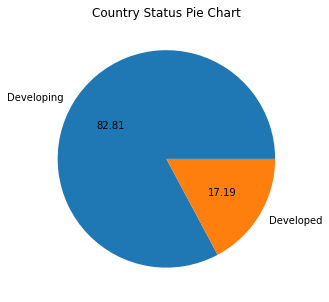

In [ ]:
plt.figure(figsize=(10, 5))
train_data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

**Observation**
- As we can see **developing** coutries are way more than **developed** ones

**Univariate analysis**

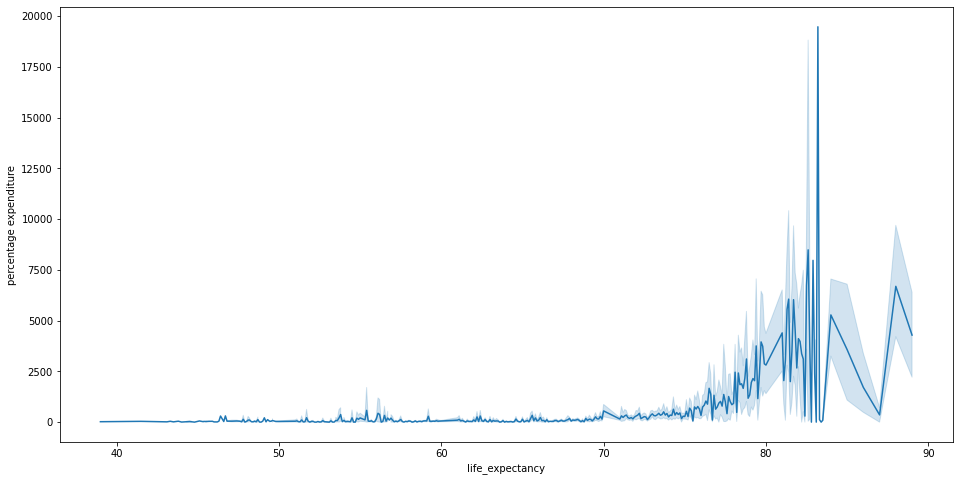

In [ ]:
# analysis of percentage expenditure with target variable
plt.figure(figsize=(16, 8))
sns.lineplot(y="percentage expenditure", x="life_expectancy",data=train_data, palette="Set3")

**Observation**
- When we see large expenditure we observe **high life expectancy**.
- We can conclude that large expenditure also spend on **health care**

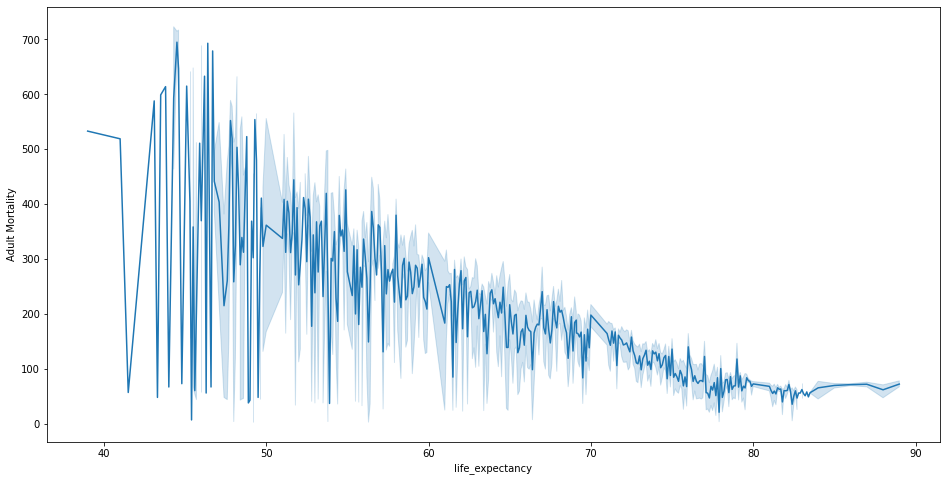

In [ ]:
# analysis of adult mortality with target variable
plt.figure(figsize=(16, 8))
sns.lineplot(y="Adult Mortality", x="life_expectancy",data=train_data, palette="Set3")

**Observation**
- Here can see life expectancy is **high** where we have **low** Adult mortality

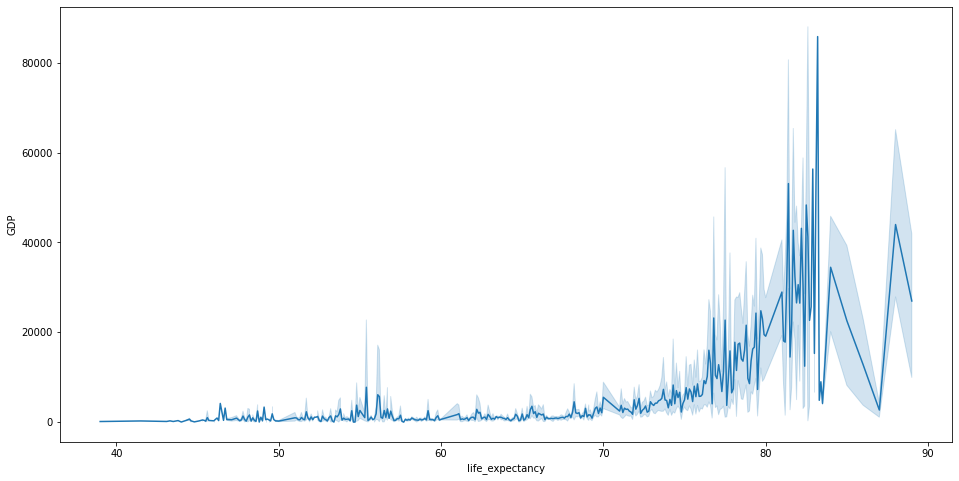

In [ ]:
# analysis of GDP with target variable
plt.figure(figsize=(16, 8))
sns.lineplot(y="GDP", x="life_expectancy",data=train_data, palette="Set3")

**Observation**
- When we see large GDP we observe **high life expectancy**.
- We can conclude that GDP also spend on **health care**

**Multivariate analysis**

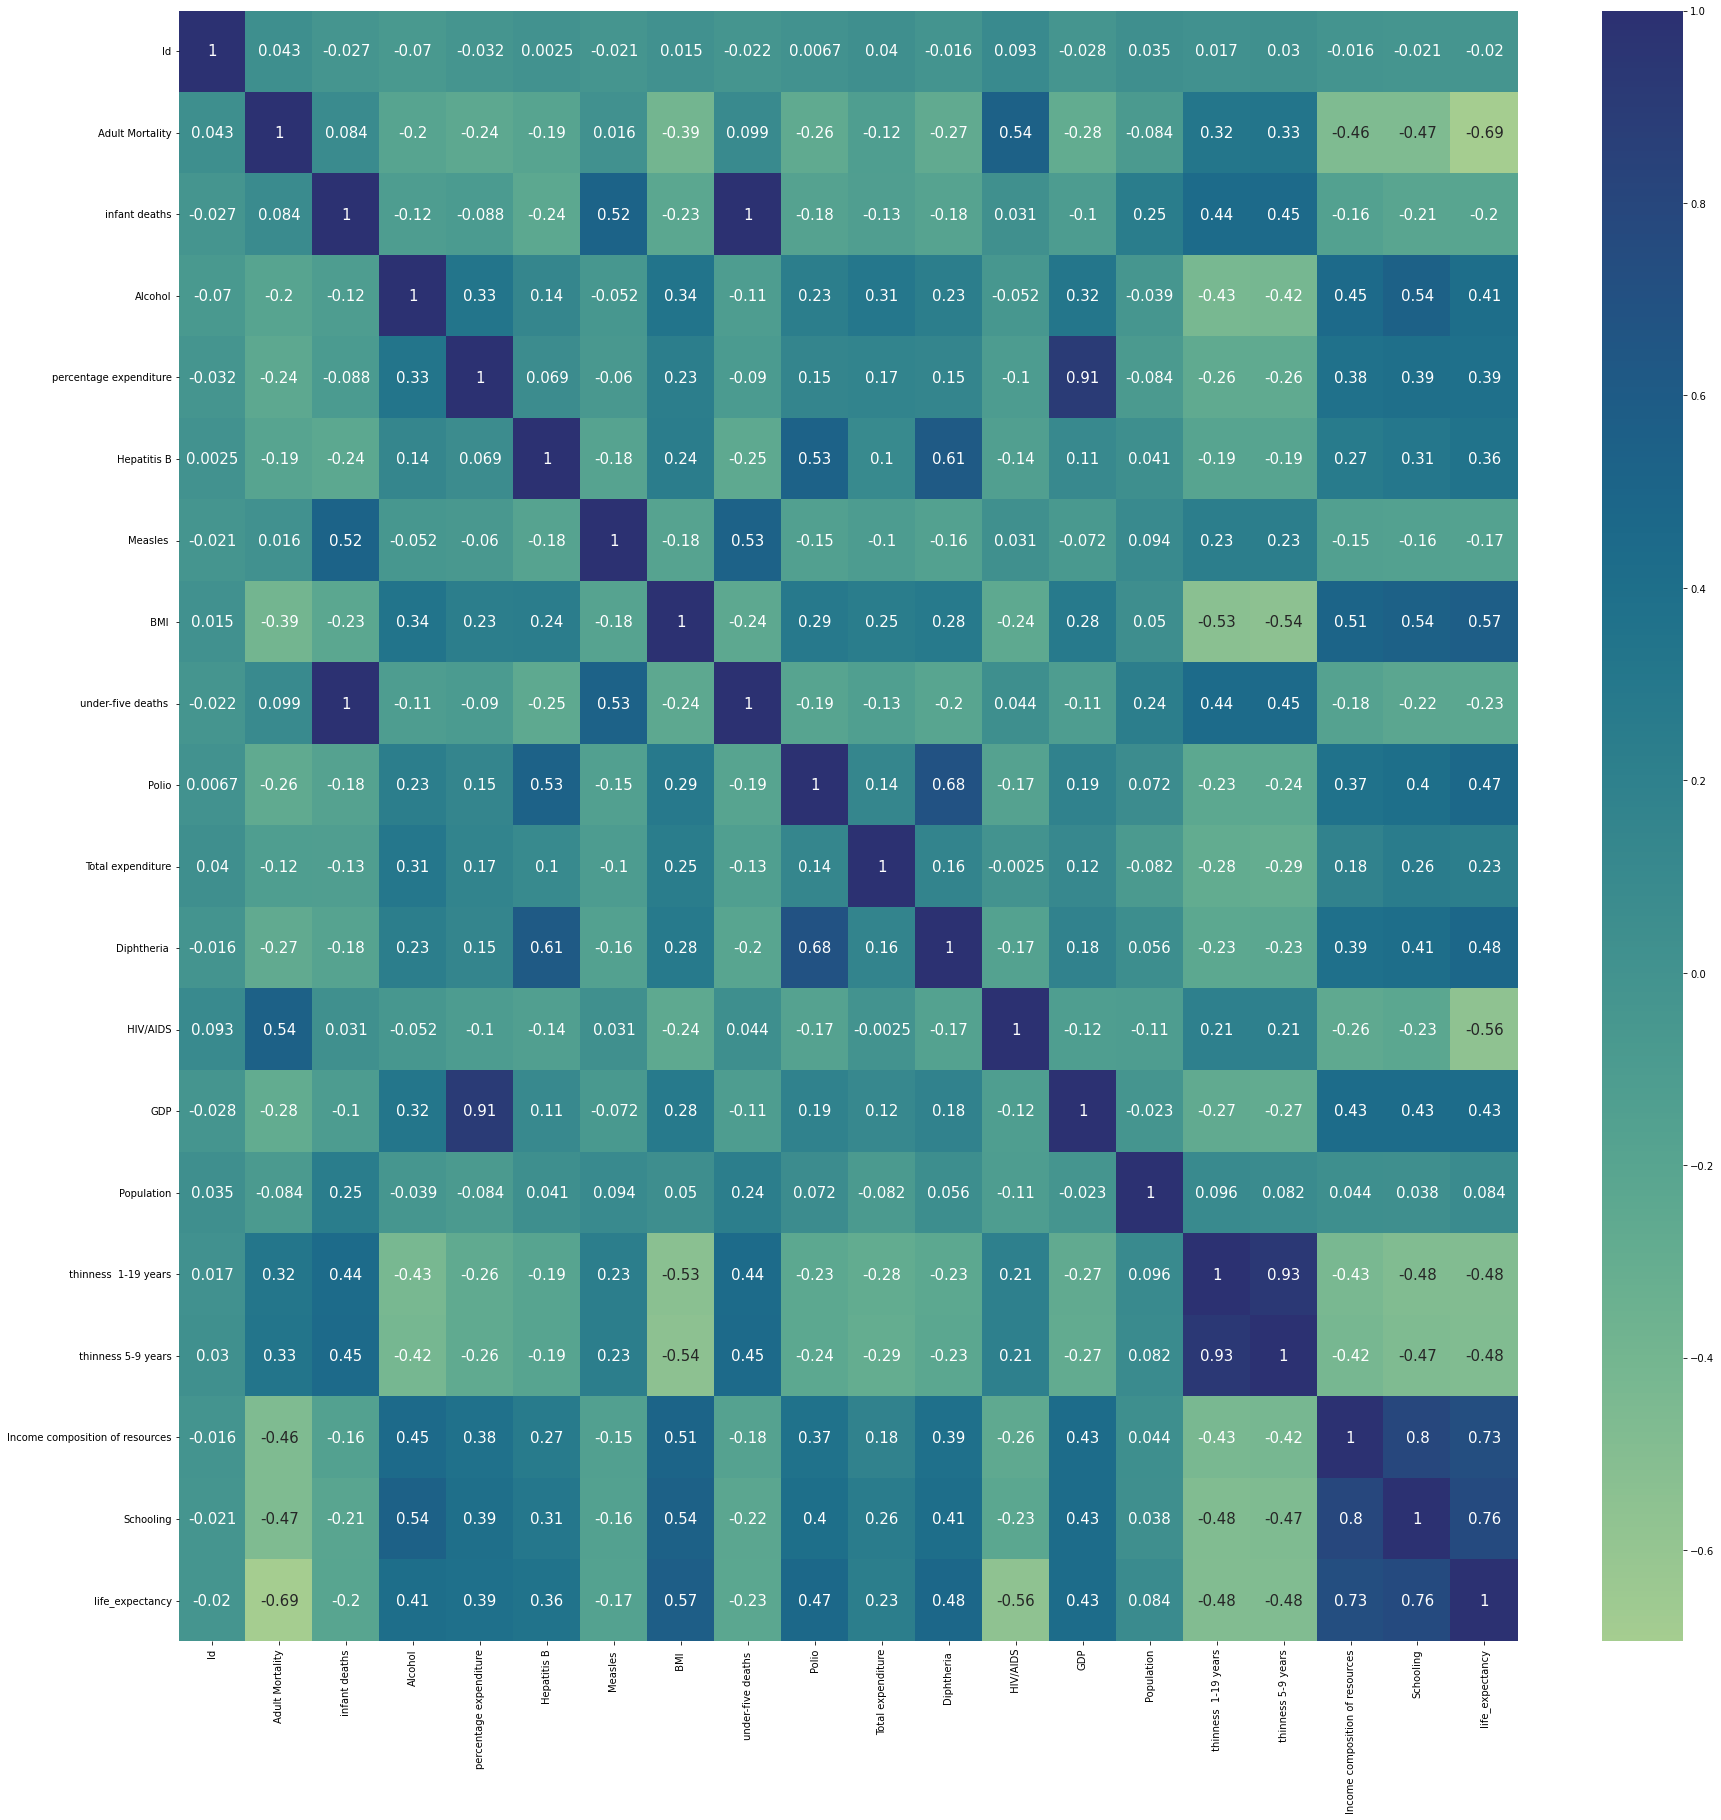

In [ ]:
#  correlaion using heatmap
plt.figure(figsize=(30,30))
a =sns.heatmap(train_data.corr(),annot=True, cmap='crest', annot_kws={'size':15},square=False)

**Observation**
- Measels & infant death are correlated(0.5), Means mose infants died due to measels
- BMI -> Alcohol**(0.33)**, More alchol causes **higher BMI**.
- under five & infant deaths **(1)**, both are similer
- Polio-> HepatitisB **(0.49)**
- Diptheria-> HepatitisB **(0.61)**
- Diptheria-> Polio **(0.67)**
- HIV -> Adult Mortality **(0.52)**, many adults died due to HIV
- GDP -> percentage Expenditure **(0.9)**
- population -> infant deaths**(0.56)**
- thinness -> infant deaths**(0.47)**

<a name=Section6></a>

---
# **6. Making data model ready**
---

In [ ]:
train_data.head()

Id      Status  Adult Mortality  infant deaths  Alcohol  \
0   391   Developed        155.00000              1 10.98000   
1   289  Developing        216.00000              0  0.01000   
2    27  Developing         17.00000              1  4.54000   
3   999   Developed         76.00000              2 11.20000   
4  1469  Developing         13.00000              1  2.10000   

   percentage expenditure  Hepatitis B  Measles      BMI   under-five deaths   \
0               107.98261     96.00000         1 61.50000                   1   
1               209.39213     99.00000         0 23.60000                   1   
2               221.84280     99.00000         7 48.90000                   1   
3              7584.07858     88.00000       780 59.90000                   3   
4               618.36149     75.00000       213  6.20000                   1   

     Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0 96.00000            6.61000     95.00000    0.10000  7296.12248   
1 98.00000            3.57000     99.00000    0.50000  2522.79680   
2 98.00000            6.38000     97.00000    0.10000  2416.58824   
3 94.00000           11.25000     95.00000    0.10000 41785.55691   
4 74.00000            8.91000     75.00000    0.10000  5424.22356   

     Population   thinness  1-19 years   thinness 5-9 years  \
0 7492561.00000                2.10000              2.10000   
1  776448.00000               15.70000             16.20000   
2  326939.00000                1.80000              1.90000   
3 8177693.00000                1.10000              1.10000   
4 3863267.00000                4.70000              4.60000   

   Income composition of resources  Schooling  life_expectancy  
0                          0.76100   13.80000         72.90000  
1                          0.59600   12.50000         69.40000  
2                          0.68100   10.90000         73.00000  
3                          0.90700   16.70000         81.00000  
4                          0.00000   14.20000         73.70000

- We see that Status is only categorical variable rest are numerical so lets encode our categorical variable

In [62]:
# here we replaced Devopled with 1 and Developing with 0
train_data['Status'] = np.where(train_data["Status"] =='Developed',1,0)


In [63]:
# here we replaced Devopled with 1 and Developing with 0
test_data['Status'] = np.where(test_data["Status"] =='Developed',1,0)

In [64]:
y=train_data['life_expectancy']
X=train_data.drop('life_expectancy',axis=1)

In [65]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

<a name=Section7></a>

---
# **7. Model Building**
---

### **7.1 Linear Regression Model**

In [66]:
# Building the Linear Regression model.
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred=linreg.predict(X_test) # predicting on our test data after splitting

In [68]:
print(r2_score(y_test, y_pred)) # calulating r2_score

0.8530955190053745


**Observation**
- Using linear regression we got **85%** r2 score

### **7.2 Random forest Model with tuning**

In [69]:
# Hyperparameter tuning of Random Forest
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)             

In [70]:
g_search.fit(X_train, y_train) # fitting our model

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [71]:
g_search.best_estimator_ # best parameters after tuning

RandomForestRegressor(n_estimators=15, random_state=1)

- Fitting Random forest with best parameters

In [72]:
rfc= RandomForestRegressor(n_estimators=15, random_state=1) # fitting model with best parameters
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=15, random_state=1)

In [73]:
y_pred= rfc.predict(X_test) # predicting our test data after splitting

In [74]:
print(r2_score(y_test, y_pred)) # getting r2 score

0.9603985466279954


**Observation**
- Using Random Forest Regressor we got r2 score of **96 %**

### **7.2 LGBMRegressor Model with tuning**

In [75]:
# Hyperparameter tuning of LGBM regressor
from lightgbm import LGBMRegressor
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = LGBMRegressor()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)

In [76]:
gbdt_grid.fit(X_train, y_train) # fitting our model

GridSearchCV(estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7]),
                         'n_estimators': array([130, 140, 150, 160])})

In [77]:
gbdt_grid.best_estimator_ # getting best parameters

LGBMRegressor(max_depth=6, n_estimators=160)

In [78]:
lgbm= LGBMRegressor(max_depth=6, n_estimators=160) # Fitting LGBM with best parameters
lgbm.fit(X_train,y_train)

LGBMRegressor(max_depth=6, n_estimators=160)

In [79]:
y_pred= lgbm.predict(X_test)# predicting out test data after splitting

In [80]:
print(r2_score(y_test, y_pred)) # getting r2 score of our model

0.9627805250829234


**Observation**
- Using LGBMRegressor we gor r2 score of 96.27 %
- Comparing all the three model that we applied for our regression, we found that **best performance metric** was given by **LGBM Regressor**

<a name=Section8></a>

---
# **8. Model evaluation**

- Since we know our best model is **LGBM regressor**, so we will predict test set target variable and compare with our original y_test and evaluate our model

In [84]:
y_test_original= pd.read_csv('/content/WHO_y_test.csv',names=['Id','life_expectancy'])
y_test_original.head()

Id  life_expectancy
0  1554         65.50000
1  2644         72.20000
2  2322         87.00000
3  1875         73.00000
4  1278         79.70000

In [96]:
y_test_original.isnull().sum() # so we single missing value in our original test target variable data

Id                 0
life_expectancy    1
dtype: int64

In [97]:
y_test_original['life_expectancy']=y_test_original['life_expectancy'].fillna(value=y_test_original['life_expectancy'].mean()) # filling our missing values

In [98]:
y_test_original.isnull().sum() # cross chechking null values

Id                 0
life_expectancy    0
dtype: int64

In [99]:
y_original= y_test_original['life_expectancy']

In [82]:
y_pred = lgbm.predict(test_data) # predicted values of our test data

In [100]:
submission = pd.DataFrame({'Id':test_data['Id'], 'life_expectancy':y_pred}) # our submission file
submission.head()

Id  life_expectancy
0  1554         64.40338
1  2644         72.25130
2  2322         80.21343
3  1875         70.78181
4  1278         81.33885

In [101]:
# r2_score on the test set using LGBM modle
print('R2 Score for test data is:', r2_score(y_original,y_pred) )

R2 Score for test data is: 0.9340344976620673


Observation
- Here can see we got r2 score of **93.40 %**  on test data

**Making Submission File**

In [103]:
submission.to_csv('submission.csv', header=False,index= False)

<a name=Section9></a>

---
# **9. Conclusion**

---

- We can see that the , Random Forest regressor and LGBM model perform well after tuning.
- As per results we will select **LGBM Regressor** as the best model 

- We also saw how **co-related features** helped us in imputation of each other to make predictions much better